My first notebook

In [2]:
print('Hello world')

Hello world


In [3]:
print('Hello Mahender')

Hello Mahender


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\mahen\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
ur1 = r'D:\Data science\FSDS 4pm\25th June\titanic_ dataset_final.csv'
df = pd.read_csv(ur1)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


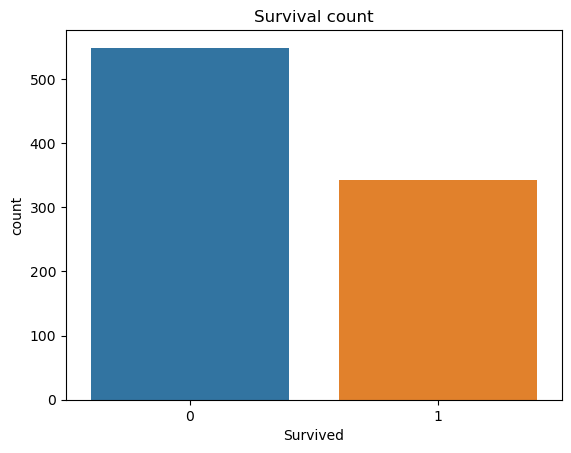

In [7]:
sns.countplot(x='Survived', data = df)
plt.title('Survival count')
plt.show()

In [8]:
import ollama

def generate_insights(df_summary):
    prompt = f'Analyze the dataset summary and provide insights:\n\n{df_summary}'
    response = ollama.chat(model='mistral', messages=[{'role': 'user', 'content': prompt}])
    return response['message']['content']

summary = df.describe().to_string()
insights = generate_insights(summary)
print('\n  AI-Generated Insights:\n', insights)


  AI-Generated Insights:
  The dataset is a subset of the Titanic passenger data, containing 891 unique records. Here's an overview and some insights from the provided summary:

1. The majority (~65%) of passengers survived the sinking of the Titanic.
2. The average (mean) passenger was traveling in a third-class cabin (Pclass=2.308642), aged 29.7 years, with an average fare of $32.20.
3. The standard deviation (std) values suggest that there is variation in the age, Pclass, and fare across passengers. For example, the age of a passenger could vary by up to approximately 14.5 years from the mean, and fares could range from nearly $0 to over $500.
4. The minimum and maximum values provide insights into the range of each variable:
   - PassengerId ranges from 1 to 891 (unique identifiers)
   - Survived ranges from 0 (deceased) to 1 (survived)
   - Pclass ranges from 1 (first class) to 3 (third class)
   - Age varies between 0.42 and 80 years
   - SibSp (number of siblings or spouses abo

In [9]:
import gradio as gr
def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights = generate_insights(summary)
    return insights

#create web interface
demo = gr.Interface(fn=eda_analysis, inputs='file', outputs='text', title='AI-Powered EDA with Mistral')

#Launch
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7863
* Running on public URL: https://00b64ef925c8ec214d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [11]:
def eda_analysis(file_path):
    df = pd.read_csv(file_path)

In [12]:
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\mahen\AppData\Local\Temp\ipykernel_26228\2463649062.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\mahen\AppData\Local\Temp\ipykernel_26228\2463649062.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [13]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\mahen\AppData\Local\Temp\ipykernel_26228\4072275310.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [14]:
summary = df.describe(include='all').to_string()

In [ ]:
missing_values = df.isnull().sum().to_string()

In [16]:
insights = generate_ai_insights(summary)

NameError: name 'generate_ai_insights' is not defined